In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [3]:
# Load the data
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

In [4]:
# Remove null values
X.dropna(inplace=True)

In [5]:
# Denoise using median filter
X = X[(X - X.median()).abs() < 3 * X.std()]

In [6]:
# Impute missing values with mean
X.fillna(X.mean(), inplace=True)

In [7]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Perform PCA for feature extraction
pca1 = PCA(n_components=3)
pca2 = PCA(n_components=5)
pca3 = PCA(n_components=7)
X_pca1 = pca1.fit_transform(X_scaled)
X_pca2 = pca2.fit_transform(X_scaled)
X_pca3 = pca3.fit_transform(X_scaled)

In [9]:
# Create a list of PCA feature sets to compare
pca_list = [(X_pca1, 'PCA1'), (X_pca2, 'PCA2'), (X_pca3, 'PCA3')]

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


PCA1 Accuracy: 1.00


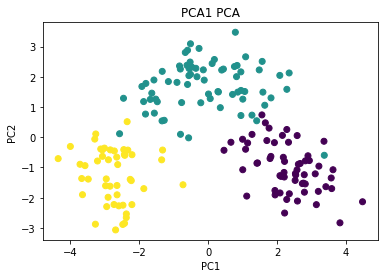

PCA2 Accuracy: 0.94


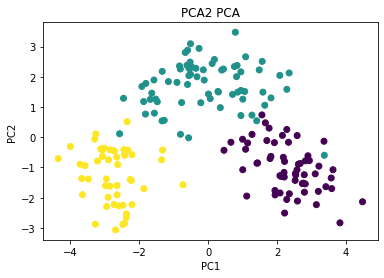

PCA3 Accuracy: 0.97


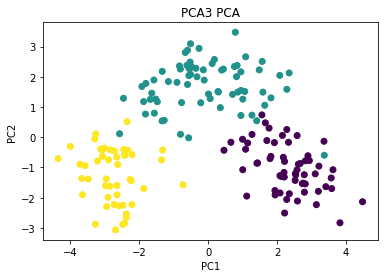

In [11]:
# Train the KNN classifier with each PCA feature set
best_accuracy = 0
for X_pca, name in pca_list:
    # Split into training and testing sets
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Train the KNN classifier
    k = 5
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_pca, y_train_pca)

    # Make predictions on the test set
    y_pred = clf.predict(X_test_pca)

    # Evaluate the accuracy of the classifier
    accuracy = accuracy_score(y_test_pca, y_pred)

    # Print the accuracy for this feature set
    print(f'{name} Accuracy: {accuracy:.2f}')

    # Update the best feature set if this one has a higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_X_train = X_train_pca
        best_X_test = X_test_pca
        best_name = name

    # Plot the first two principal components for visualization
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'{name} PCA')
    plt.show()

In [14]:
# Error analysis
from sklearn.metrics import classification_report, confusion_matrix
print(f'Best Feature Set ({best_name}) Accuracy: {best_accuracy:.2f}')

# Generate classification report and confusion matrix
target_names = data.target_names.tolist()
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Best Feature Set (PCA1) Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      0.93      0.96        14
     class_2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36


Confusion Matrix:
[[14  0  0]
 [ 0 13  1]
 [ 0  0  8]]
